<a href="https://colab.research.google.com/github/ramansandhu17/stockprediction/blob/main/stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance matplotlib pandas

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
stock_symbol = ['AAPL','MSFT','GOOGL','JNJ','PG','KO','PEP','WMT','V','MCD']

data=yf.download(stock_symbol, period='1y')

print(data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  10 of 10 completed

Price            Close                                                 \
Ticker            AAPL       GOOGL         JNJ         KO         MCD   
Date                                                                    
2024-03-27  172.495499  150.152115  153.050034  59.257683  275.324280   
2024-03-28  170.674103  150.211838  153.272888  59.403328  275.256012   
2024-04-01  169.230911  154.750153  152.875641  58.917847  273.567108   
2024-04-02  168.046494  153.824585  152.827179  58.403244  271.145935   
2024-04-03  168.852707  154.182877  149.465027  58.092533  268.998169   

Price                                                                  ...  \
Ticker            MSFT         PEP          PG           V        WMT  ...   
Date                                                                   ...   
2024-03-27  418.236877  167.982483  158.694412  276.953705  60.040295  ...   
2024-03-28  417.532288  169.376114  158.343094  277.013306  59.496452  ...   
2024-04-01  421.353119  1

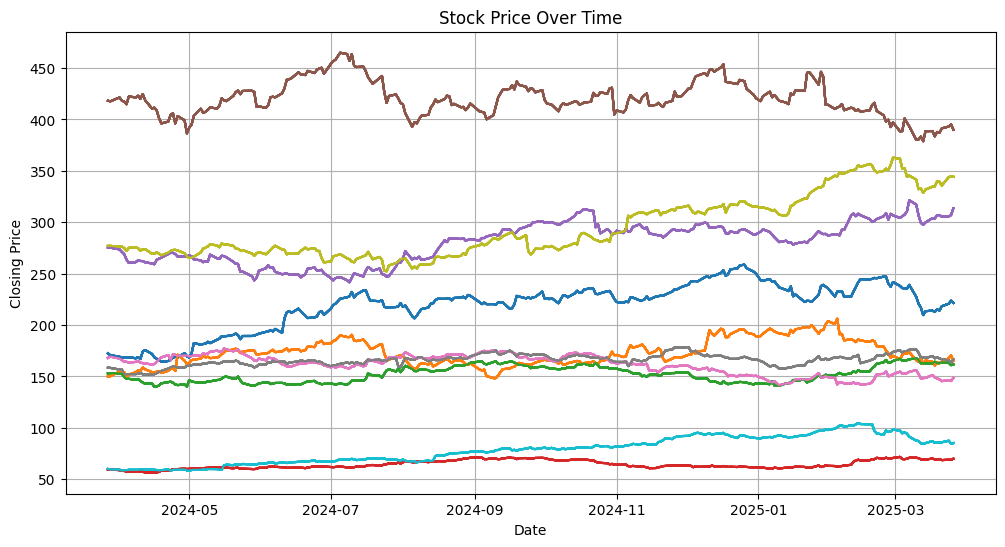

In [11]:
plt.figure(figsize=(12,6))

for symbol in stock_symbol:
    plt.plot(data['Close'],label=symbol)

plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Price Over Time")
#plt.legend(title="Stock Symbol")
plt.grid(True)
plt.show()

In [14]:
import plotly.graph_objects as go

stocks = {
    'AAPL': 'Apple',
    'MSFT': 'Microsoft',
    'GOOGL': 'Google',
    'JNJ': 'Johnson & Johnson',
    'PG': 'Procter & Gamble',
    'QUBT':'Quantum',
    'DOGE':'Dogecoin',
    'BTC':'Bitcoin'
}

stocks_df=yf.download(list(stocks.keys()),period='1y')
#Rows = dates, column - each stock symbol, values = closing prices

print(stocks_df.head())
fig=go.Figure()

for symbol, name in stocks.items():
    fig.add_trace(go.Scatter(
        x=stocks_df.index,              # Dates on the x-axis
        y=stocks_df['Close'][symbol],            # Stock’s closing prices on the y-axis
        mode='lines',              # Line chart
        name=name,                 # What shows in the legend (full company name)
        hovertemplate=f"<b>{name}</b><br>Date: %{{x|%Y-%m-%d}}<br>Price: $%{{y:.2f}}<extra></extra>"
    ))

fig.show()

[*********************100%***********************]  5 of 5 completed


Price            Close                                                  \
Ticker            AAPL       GOOGL         JNJ        MSFT          PG   
Date                                                                     
2024-03-27  172.495514  150.152115  153.050034  418.236908  158.694412   
2024-03-28  170.674103  150.211838  153.272873  417.532318  158.343094   
2024-04-01  169.230911  154.750153  152.875610  421.353119  156.713318   
2024-04-02  168.046509  153.824570  152.827179  418.246826  156.703568   
2024-04-03  168.852692  154.182861  149.465042  417.264343  152.389969   

Price             High                                                  ...  \
Ticker            AAPL       GOOGL         JNJ        MSFT          PG  ...   
Date                                                                    ...   
2024-03-27  172.784160  150.918455  153.301946  421.234045  158.821287  ...   
2024-03-28  171.420578  150.709459  154.193340  418.673599  159.211662  ...   
2024-04-01  

In [ ]:
def max_profit(prices):
  max_sum=0
  current_sum=0

  buy=sell=temp_buy=0

  for i in range(1,len(prices)):
    diff = prices[i] - prices[i - 1]     # Daily gain/loss

    if current_sum + diff > 0:
            current_sum += diff
    else:
            current_sum = 0
            temp_buy = i  # Potential new buy day

    if current_sum > max_sum:
            max_sum = current_sum
            buy = temp_buy
            sell = i

    return max_sum, buy, sell